In [1]:
# Exploratory Data Analysis (EDA) of the MNIST Dataset


# In this notebook, we will excecute the following steps:
# Load MNIST using `torchvision`
# Inspect image shapes and dataset sizes
# Visualize random samples
# Check class distribution
# Look at pixel intensity distributions
# Compare averages of digits

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision
import torchvision.transforms as transforms


plt.style.use("default")
sns.set_theme(style="whitegrid")

In [29]:
# Loading Data:
transform = transforms.ToTensor()

train_dataset = torchvision.datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform,
)


test_dataset = torchvision.datasets.MNIST(
    root="./data",
    train=False,
    download=True,
    transform=transform,
)


In [9]:
# Taking one sample
img, label = train_dataset[0]
print("Single image shape:", img.shape)

# Inspecting shape
print("Label:", label)
print("Number of training samples:", len(train_dataset))
print("Number of test samples:", len(test_dataset))


Single image shape: torch.Size([1, 28, 28])
Label: 5
Number of training samples: 60000
Number of test samples: 10000


Digit 0: 5923
Digit 1: 6742
Digit 2: 5958
Digit 3: 6131
Digit 4: 5842
Digit 5: 5421
Digit 6: 5918
Digit 7: 6265
Digit 8: 5851
Digit 9: 5949


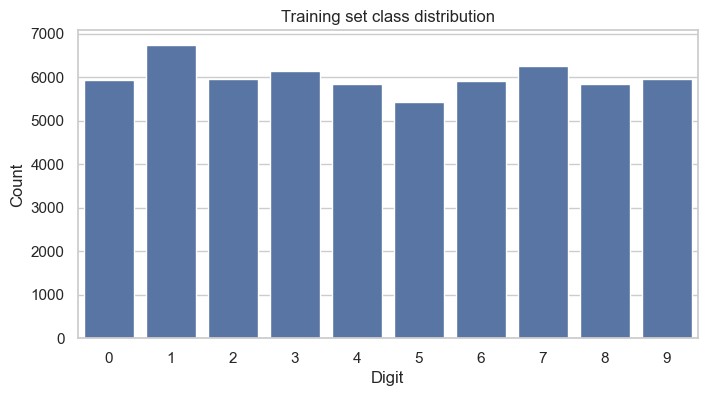

In [21]:
#Visualizing and counting datapoints
labels_train = np.array([label for _, label in train_dataset])
unique, counts = np.unique(labels_train, return_counts=True)
for digit, cnt in zip(unique, counts):
    print(f"Digit {digit}: {cnt}")

plt.figure(figsize=(8, 4))
sns.barplot(x=unique, y=counts)
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Training set class distribution")
plt.show()


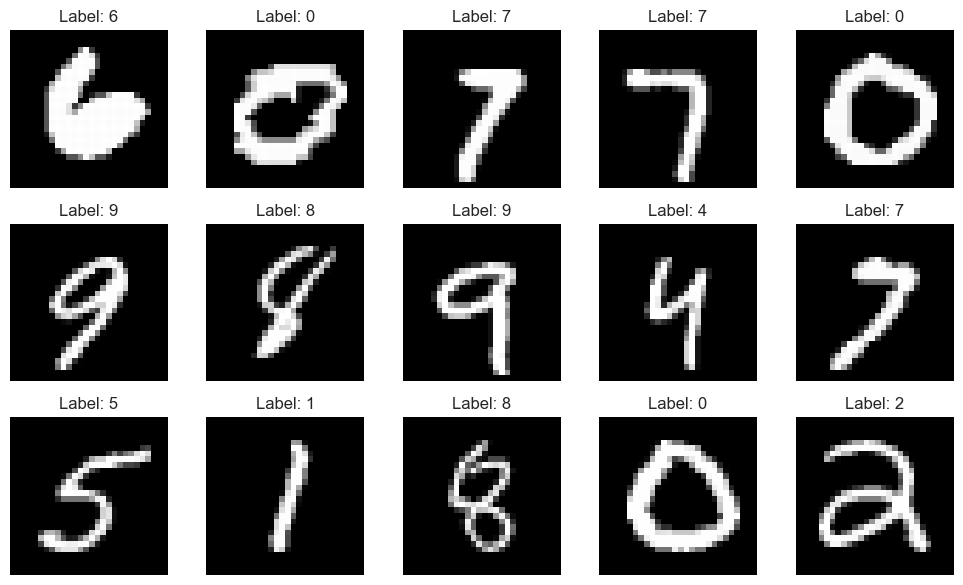

In [22]:
#Visualizing a random sample training datapoint
def show_random_images(dataset, n_rows=3, n_cols=5):
    plt.figure(figsize=(n_cols * 2, n_rows * 2))
    for i in range(n_rows * n_cols):
        idx = np.random.randint(0, len(dataset))
        img, label = dataset[idx]
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(img.squeeze(), cmap="gray")
        plt.title(f"Label: {label}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()


show_random_images(train_dataset, n_rows=3, n_cols=5)


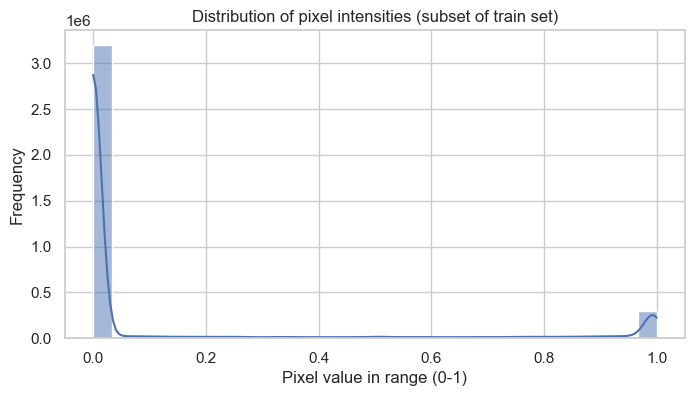

In [23]:
# Sample subset to increase training speed
subset_size = 5000
indices = np.random.choice(len(train_dataset), size=subset_size, replace=False)
pixels = []
for idx in indices:
    img, _ = train_dataset[idx]
    pixels.append(img.numpy().ravel())
pixels = np.concatenate(pixels)


plt.figure(figsize=(8, 4))
sns.histplot(pixels, bins=30, kde=True)
plt.title("Distribution of pixel intensities (subset of train set)")
plt.xlabel("Pixel value in range (0-1)")
plt.ylabel("Frequency")
plt.show()


Counts used per digit: [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


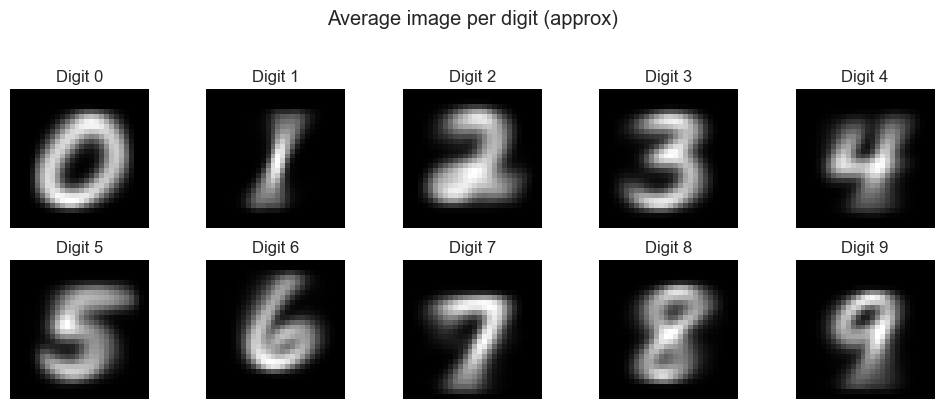

In [24]:
# Calculating average image for each digit
def compute_average_digit_images(dataset, num_digits=10, max_per_digit=1000):
    sums = [np.zeros((28, 28), dtype=np.float32) for r in range(num_digits)]
    counts = [0 for r in range(num_digits)]

    for img, label in dataset:
        arr = img.squeeze().numpy()
        if counts[label] < max_per_digit:
            sums[label] += arr
            counts[label] += 1
        # Early stopping at max_per_digit to save computation
        if all(c >= max_per_digit for c in counts):
            break

    averages = [sums[d] / max(counts[d], 1) for d in range(num_digits)]
    return averages, counts

avg_images, counts = compute_average_digit_images(train_dataset, max_per_digit=1000)
print("Counts used per digit:", counts)

# Display the average image per digit
plt.figure(figsize=(10, 4))

for d in range(10):
    plt.subplot(2, 5, d + 1)
    plt.imshow(avg_images[d], cmap="gray")
    plt.title(f"Digit {d}")
    plt.axis("off")

    # Show average image in the middle of the grid
    if d == 4:
        plt.subplot(2, 5, 9)
        plt.imshow(np.mean(avg_images, axis=0), cmap="gray")
        plt.title("Average")
        plt.axis("off")


plt.suptitle("Average image per digit (approx)", y=1.02)
plt.tight_layout()
plt.show()


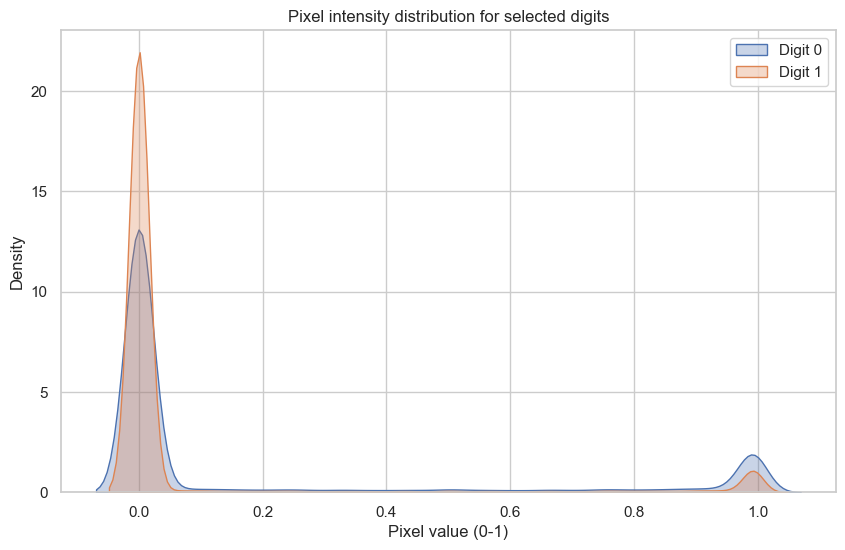

In [27]:
# Comparing pixel distributions amongst two digits, e.g. 0 & 1
digits_to_compare = [0, 1]
plt.figure(figsize=(10, 6))


for d in digits_to_compare:
    idx = np.where(labels_train == d)[0]
    idx = np.random.choice(idx, size=min(1000, len(idx)), replace=False)
    pix = []
    for idx in idx:
        img, _ = train_dataset[idx]
        pix.append(img.numpy().ravel())
    pix = np.concatenate(pix)
    sns.kdeplot(pix, label=f"Digit {d}", fill=True, alpha=0.3)

# Comparision plot
plt.xlabel("Pixel value (0-1)")
plt.ylabel("Density")
plt.title("Pixel intensity distribution for selected digits")
plt.legend()
plt.show()


In [28]:
# Observations

# There is a rough balance in the class distribution in the MNIST dataset across digits 0 to 9.
# Pixel intensities are more dense near 0, with highest around stroke values of 0.7-1.0.
# There sre some digits like 4, 7, 9 which are more similar lookwise, which results in misclassifications in the models.
# This Exploratory Data Analysis helps us to understand where the model could be sensitive or why certain adversarial perturbations might be effective.
